In [85]:
import torch
import numpy as np
from torch import nn
import random
import torch.nn.functional as F
import collections
from torch.optim.lr_scheduler import StepLR
from CommunicationP3DX import CommunicationP3DX
from Agent import AgentClass
from std_srvs.srv import Empty
import rospy
import time
import shelve
import os
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

path ='/media/xnd/7A309A87309A49D1/sia_23/'

med4 = 'wsh_mean4_20230930_144232'+'/wsh_20230930_162905.out'
med5 ='wsh_mean5_20230930_144232'+'/wsh_20230930_221740.out'
med6 = 'wsh_mean6_20230930_144232'+'/wsh_20231001_033900.out'
med10 = 'wsh_mean10_20230930_144232'+'/wsh_20231001_083843.out'

moda4  = 'wsh_mode4_20230930_144232'+'/wsh_20230930_202925.out'
moda5 = 'wsh_mode5_20230930_144232'+'/wsh_20231001_020028.out'
moda6 = 'wsh_mode6_20230930_144232'+'/wsh_20231001_070106.out'
moda10 = 'wsh_mode10_20230930_144232'+'/wsh_20231001_121843.out'

min4 = 'wsh_min4_20230930_144232'+'/wsh_20230930_181002.out'
min5 = 'wsh_min5_20230930_144232'+'/wsh_20230930_234528.out'
min6 = 'wsh_min6_20230930_144232'+'/wsh_20231001_050951.out'
min10 = 'wsh_min10_20230930_144232'+'/wsh_20231001_102059.out'

map_type_path_med = {
    'med4':med4,
    'med5':med5,
    'med6':med6,
    'med10':med10
}
map_type_path_moda = {
    'moda4':moda4,
    'moda5':moda5,
    'moda6':moda6,
    'moda10':moda10
}
map_type_path_min = {
    'min4':min4,
    'min5':min5,
    'min6':min6,
    'min10':min10
}

map_type_path_all = {
    'med4':med4,
    'med5':med5,
    'med6':med6,
    'med10':med10,
    'moda4':moda4,
    'moda5':moda5,
    'moda6':moda6,
    'moda10':moda10,
    'min4':min4,
    'min5':min5,
    'min6':min6,
    'min10':min10
}

workspace = shelve.open(path+med4)
# true if the key exists
vars = list(workspace.keys())
print(workspace)
print(vars)

['Agent', 'AgentClass', 'CommunicationP3DX', 'Empty', 'Memory', 'QNetwork', 'QNetworkCNN', 'Q_1', 'StepLR', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__warningregistry__', 'actions_angular', 'actions_linear', 'checkpoint_inter', 'datetime', 'device', 'evaluate', 'filename', 'goal_zones_x', 'goal_zones_y', 'hist_dict', 'laser_scan_state_type_atual', 'main', 'max_episodes', 'max_iterations', 'my_shelf', 'n_sectors', 'path', 'pause_physics_client', 'performance', 'reset_simulation', 'select_action', 'str_hora_agr', 'str_hora_inicio_treino', 'theta_atual', 'train', 'unpause_physics_client', 'update_parameters']


In [52]:
def get_rewards_df(hist_dict,method):
    rewards = []
    episodes = []
    for key in hist_dict['rewards'].keys():
        episodes.append(key)
        rewards.append(hist_dict['rewards'][key][0])
    return pd.DataFrame({'Episodes':episodes, 'Rewards'+method:rewards})

def get_distances_df(hist_dict, method):
    distances = []
    episodes = []
    for key in hist_dict['rewards'].keys():
        episodes.append(key)
        distances.append(hist_dict['rewards'][key][1])
    return pd.DataFrame({'Episodes':episodes, 'Distances'+method:distances})

## Reward and distance

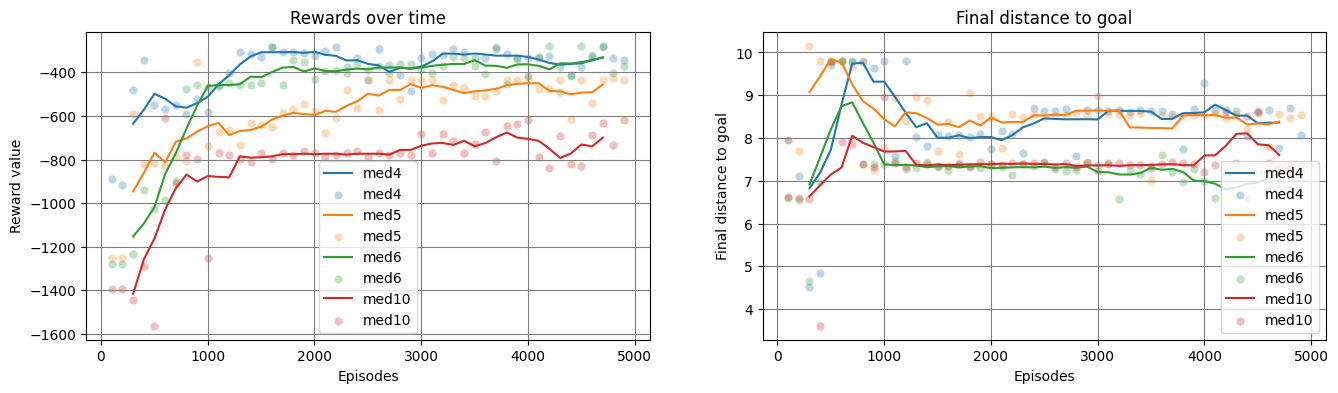

In [63]:
rewards_df = pd.DataFrame({'Episodes':[]})
distances_df = pd.DataFrame({'Episodes':[]})

for idx, method in enumerate(map_type_path_med.keys()):

    hist_dict_method = shelve.open(path+map_type_path_med[method])['hist_dict']

    rewards_df_method = get_rewards_df(hist_dict_method,method)
    distances_df_method = get_distances_df(hist_dict_method,method)

    rewards_df = rewards_df.merge(rewards_df_method, on = 'Episodes', how = 'inner' if idx>0 else 'right')
    distances_df = distances_df.merge(distances_df_method, on = 'Episodes', how = 'inner' if idx>0 else 'right')

rewards_df.head(1)

plt.figure(figsize=(16,4));
plt.subplot(121);
for method in map_type_path_med.keys():
    sns.lineplot(rewards_df.rolling(5).mean(),x = 'Episodes', y='Rewards'+method, label=method);
    sns.scatterplot(rewards_df,x = 'Episodes', y='Rewards'+method, label=method, alpha = 0.3);

plt.legend()
plt.title('Rewards over time');
plt.ylabel('Reward value')
plt.grid(True, c='tab:gray')

plt.subplot(122);
for method in map_type_path_med.keys():
    sns.lineplot(distances_df.rolling(5).mean(),x = 'Episodes', y='Distances'+method, label=method);
    sns.scatterplot(distances_df,x = 'Episodes', y='Distances'+method, label=method, alpha = 0.3);
plt.legend()
plt.title('Final distance to goal');
plt.ylabel('Final distance to goal')
plt.grid(True, c='tab:gray')

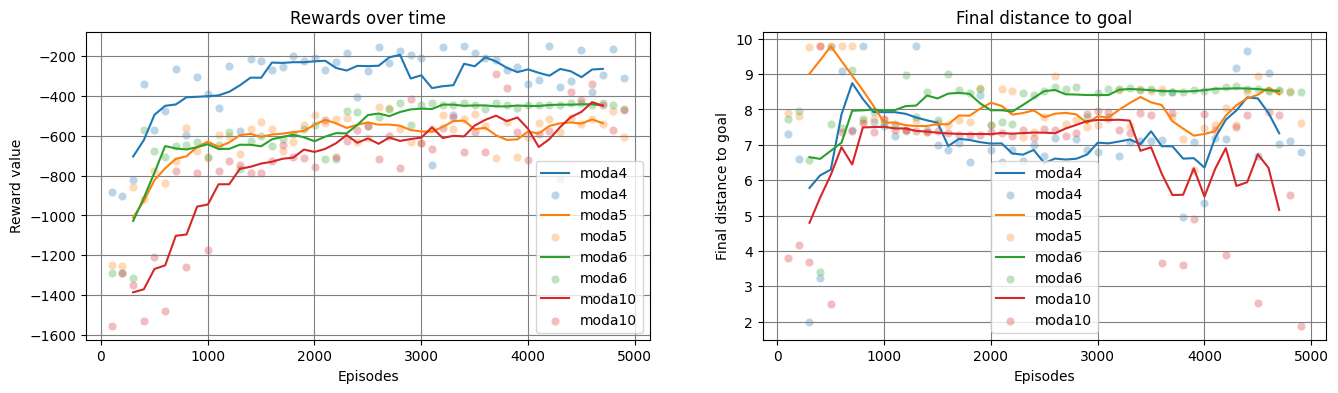

In [64]:
rewards_df = pd.DataFrame({'Episodes':[]})
distances_df = pd.DataFrame({'Episodes':[]})

for idx, method in enumerate(map_type_path_moda.keys()):

    hist_dict_method = shelve.open(path+map_type_path_moda[method])['hist_dict']

    rewards_df_method = get_rewards_df(hist_dict_method,method)
    distances_df_method = get_distances_df(hist_dict_method,method)

    rewards_df = rewards_df.merge(rewards_df_method, on = 'Episodes', how = 'inner' if idx>0 else 'right')
    distances_df = distances_df.merge(distances_df_method, on = 'Episodes', how = 'inner' if idx>0 else 'right')

rewards_df.head(1)

plt.figure(figsize=(16,4));
plt.subplot(121);
for method in map_type_path_moda.keys():
    sns.lineplot(rewards_df.rolling(5).mean(),x = 'Episodes', y='Rewards'+method, label=method);
    sns.scatterplot(rewards_df,x = 'Episodes', y='Rewards'+method, label=method, alpha = 0.3);

plt.legend()
plt.title('Rewards over time');
plt.ylabel('Reward value')
plt.grid(True, c='tab:gray')

plt.subplot(122);
for method in map_type_path_moda.keys():
    sns.lineplot(distances_df.rolling(5).mean(),x = 'Episodes', y='Distances'+method, label=method);
    sns.scatterplot(distances_df,x = 'Episodes', y='Distances'+method, label=method, alpha = 0.3);
plt.legend()
plt.title('Final distance to goal');
plt.ylabel('Final distance to goal')
plt.grid(True, c='tab:gray')

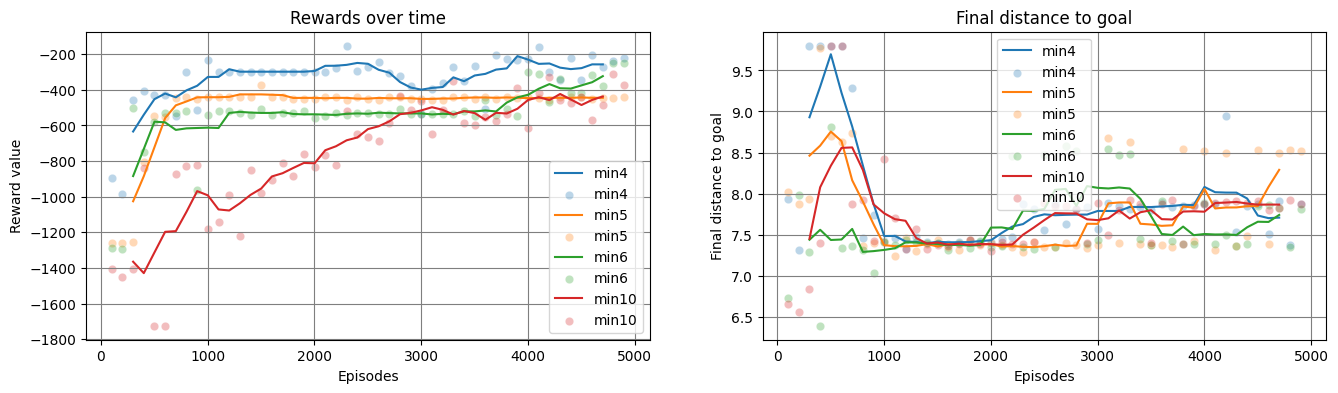

In [67]:
rewards_df = pd.DataFrame({'Episodes':[]})
distances_df = pd.DataFrame({'Episodes':[]})

for idx, method in enumerate(map_type_path_min.keys()):

    hist_dict_method = shelve.open(path+map_type_path_min[method])['hist_dict']

    rewards_df_method = get_rewards_df(hist_dict_method,method)
    distances_df_method = get_distances_df(hist_dict_method,method)

    rewards_df = rewards_df.merge(rewards_df_method, on = 'Episodes', how = 'inner' if idx>0 else 'right')
    distances_df = distances_df.merge(distances_df_method, on = 'Episodes', how = 'inner' if idx>0 else 'right')

rewards_df.head(1)

plt.figure(figsize=(16,4));
plt.subplot(121);
for method in map_type_path_min.keys():
    sns.lineplot(rewards_df.rolling(5).mean(),x = 'Episodes', y='Rewards'+method, label=method);
    sns.scatterplot(rewards_df,x = 'Episodes', y='Rewards'+method, label=method, alpha = 0.3);

plt.legend()
plt.title('Rewards over time');
plt.ylabel('Reward value')
plt.grid(True, c='tab:gray')

plt.subplot(122);
for method in map_type_path_min.keys():
    sns.lineplot(distances_df.rolling(5).mean(),x = 'Episodes', y='Distances'+method, label=method);
    sns.scatterplot(distances_df,x = 'Episodes', y='Distances'+method, label=method, alpha = 0.3);
plt.legend()
plt.title('Final distance to goal');
plt.ylabel('Final distance to goal')
plt.grid(True, c='tab:gray')

### Comparing sector_n

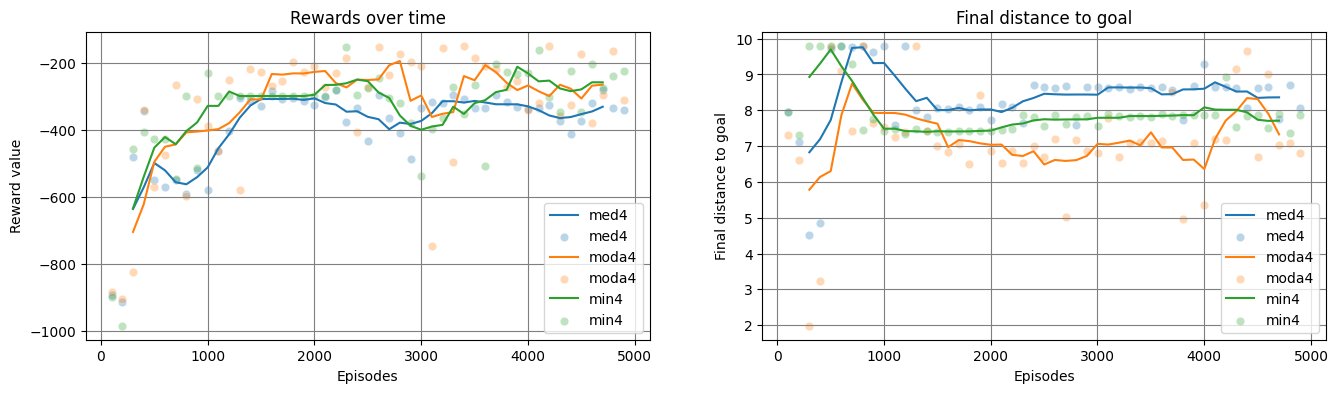

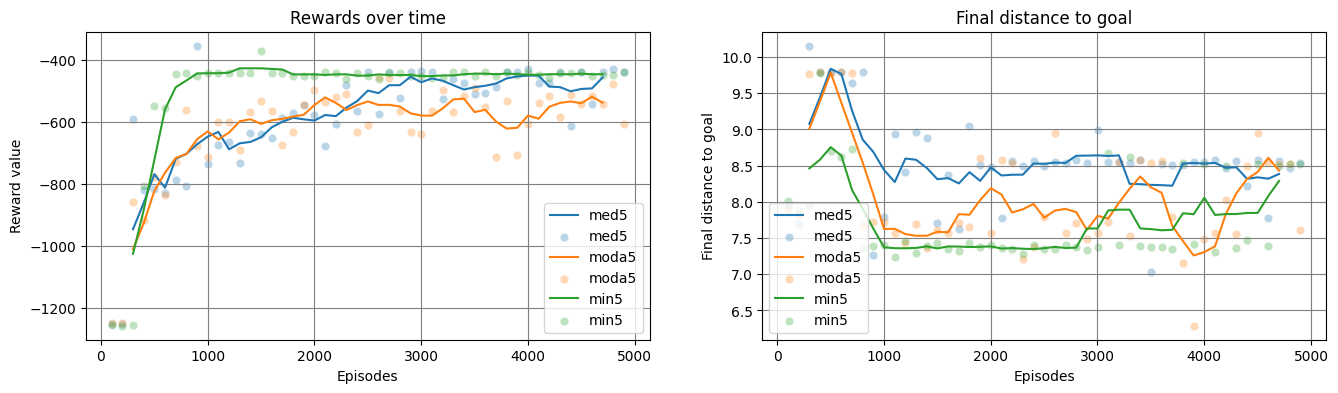

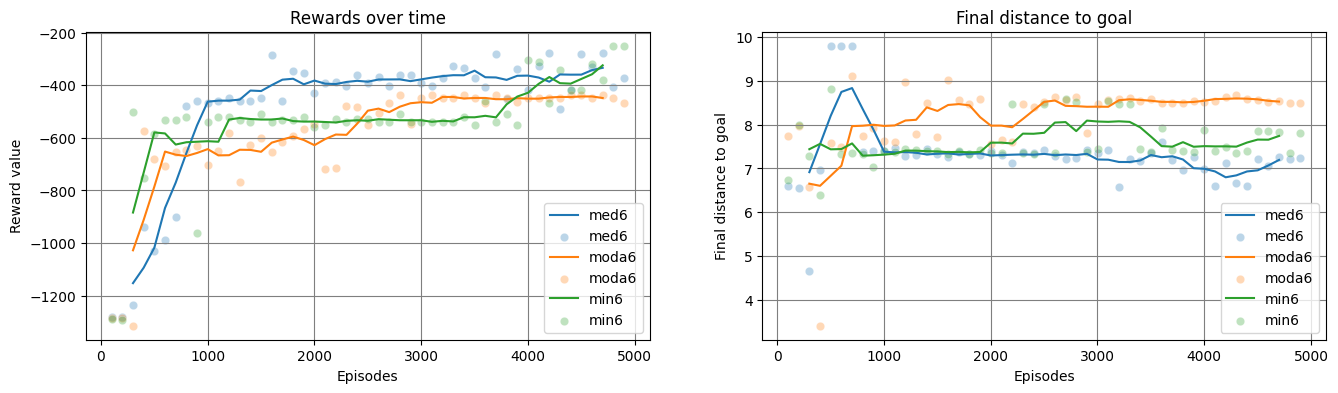

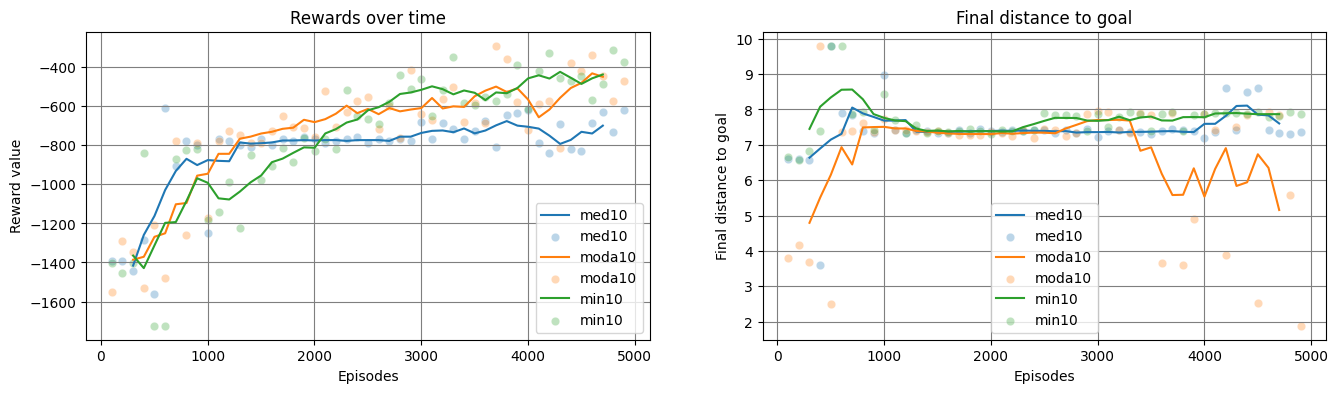

In [87]:
rewards_df = pd.DataFrame({'Episodes':[]})
distances_df = pd.DataFrame({'Episodes':[]})

for n_sectors in [4,5,6,10]:
    for idx, method in enumerate(map_type_path_all.keys()):
        if method.endswith(str(n_sectors)):
            hist_dict_method = shelve.open(path+map_type_path_all[method])['hist_dict']

            rewards_df_method = get_rewards_df(hist_dict_method,method)
            distances_df_method = get_distances_df(hist_dict_method,method)

            rewards_df = rewards_df.merge(rewards_df_method, on = 'Episodes', how = 'inner' if idx>0 else 'right')
            distances_df = distances_df.merge(distances_df_method, on = 'Episodes', how = 'inner' if idx>0 else 'right')

    rewards_df.head(1)

    plt.figure(figsize=(16,4));
    plt.subplot(121);
    for method in map_type_path_all.keys():
        if method.endswith(str(n_sectors)):
            sns.lineplot(rewards_df.rolling(5).mean(),x = 'Episodes', y='Rewards'+method, label=method);
            sns.scatterplot(rewards_df,x = 'Episodes', y='Rewards'+method, label=method, alpha = 0.3);

    plt.legend()
    plt.title('Rewards over time');
    plt.ylabel('Reward value')
    plt.grid(True, c='tab:gray')

    plt.subplot(122);
    for method in map_type_path_all.keys():
        if method.endswith(str(n_sectors)):
            sns.lineplot(distances_df.rolling(5).mean(),x = 'Episodes', y='Distances'+method, label=method);
            sns.scatterplot(distances_df,x = 'Episodes', y='Distances'+method, label=method, alpha = 0.3);
    plt.legend()
    plt.title('Final distance to goal');
    plt.ylabel('Final distance to goal')
    plt.grid(True, c='tab:gray')

## Success and colission rate

### Comparing agg

In [ ]:
# 0 for crash, 1 for goal 2 for time
def get_success_df(hist_dict,method):
    success = []
    episodes = []
    for key in hist_dict['epresult'].keys():
        episodes.append(key)
        success.append(hist_dict['epresult'][key][1])
    df = pd.DataFrame({'Episodes':episodes, 'Success'+method:success})
    df['Success'+method] = np.where(df['Success'+method]==1,1,0)
    return df

def get_collision_df(hist_dict,method):
    collision = []
    episodes = []
    for key in hist_dict['epresult'].keys():
        episodes.append(key)
        collision.append(hist_dict['epresult'][key][1])
    df = pd.DataFrame({'Episodes':episodes, 'Colission'+method:collision})
    df['Colission'+method] = np.where(df['Colission'+method]==0,1,0)
    return df

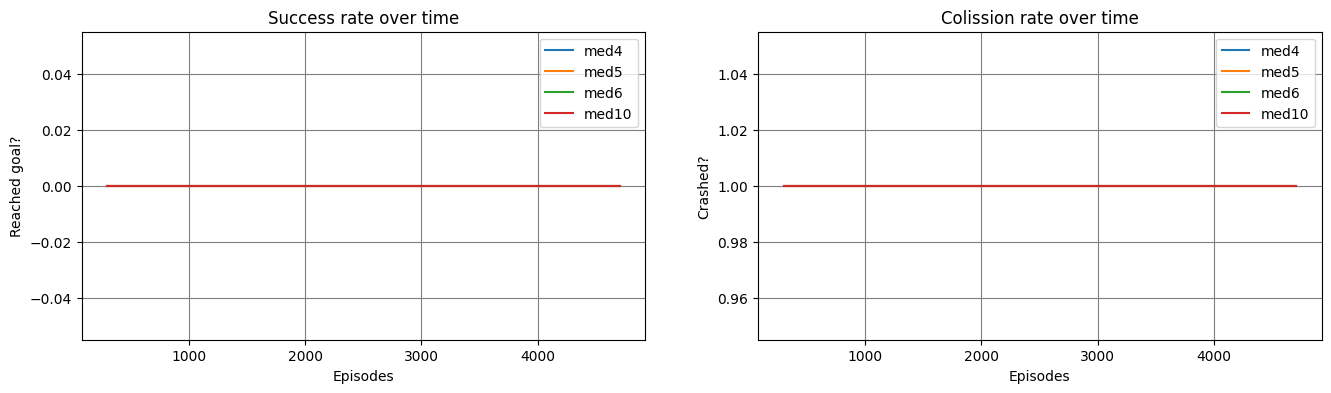

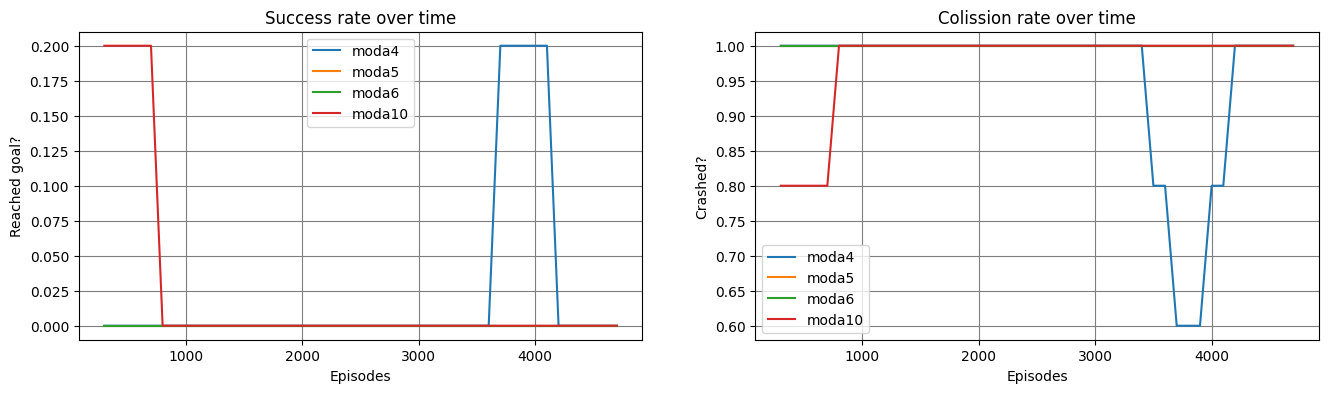

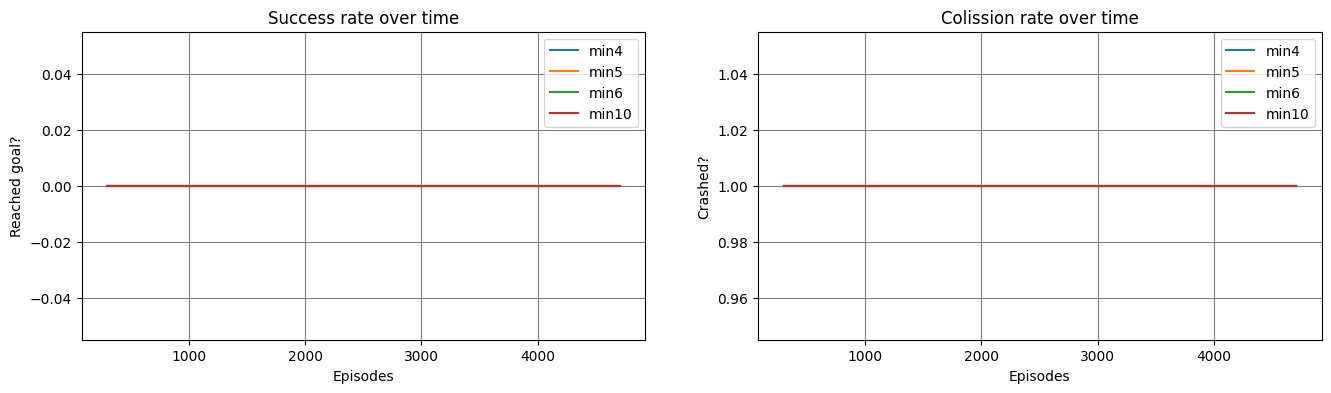

In [89]:
collision_df = pd.DataFrame({'Episodes':[]})
success_df = pd.DataFrame({'Episodes':[]})


for agg_name in ['med','moda','min']:
    for idx, method in enumerate(map_type_path_all.keys()):
        if method.startswith(str(agg_name)):
            hist_dict_method = shelve.open(path+map_type_path_all[method])['hist_dict']

            success_df_method = get_success_df(hist_dict_method,method)
            collision_df_method = get_collision_df(hist_dict_method,method)

            success_df = success_df.merge(success_df_method, on = 'Episodes', how = 'inner' if idx>0 else 'right')
            collision_df = collision_df.merge(collision_df_method, on = 'Episodes', how = 'inner' if idx>0 else 'right')

    plt.figure(figsize=(16,4));
    plt.subplot(121);
    for method in map_type_path_all.keys():
        if method.startswith(str(agg_name)):
            sns.lineplot(success_df.rolling(5).mean(),x = 'Episodes', y='Success'+method, label=method);
            #sns.scatterplot(rewards_df,x = 'Episodes', y='Rewards'+method, label=method, alpha = 0.3);

    plt.legend()
    plt.title('Success rate over time');
    plt.ylabel('Reached goal?')
    plt.grid(True, c='tab:gray')

    plt.subplot(122);
    for method in map_type_path_all.keys():
        if method.startswith(str(agg_name)):
            sns.lineplot(collision_df.rolling(5).mean(),x = 'Episodes', y='Colission'+method, label=method);
            #sns.scatterplot(distances_df,x = 'Episodes', y='Distances'+method, label=method, alpha = 0.3);
    plt.legend()
    plt.title('Colission rate over time');
    plt.ylabel('Crashed?')
    plt.grid(True, c='tab:gray')

### Comparing sector_n

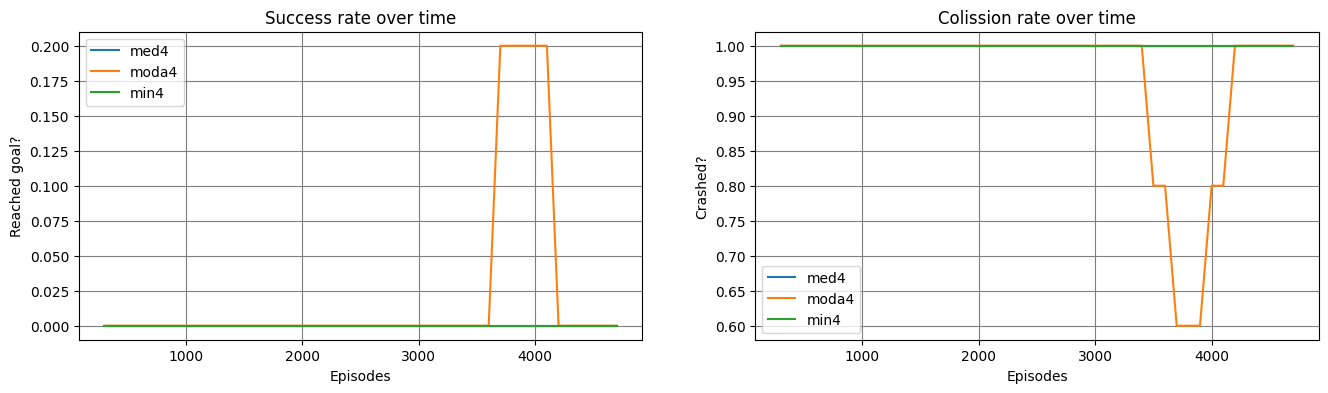

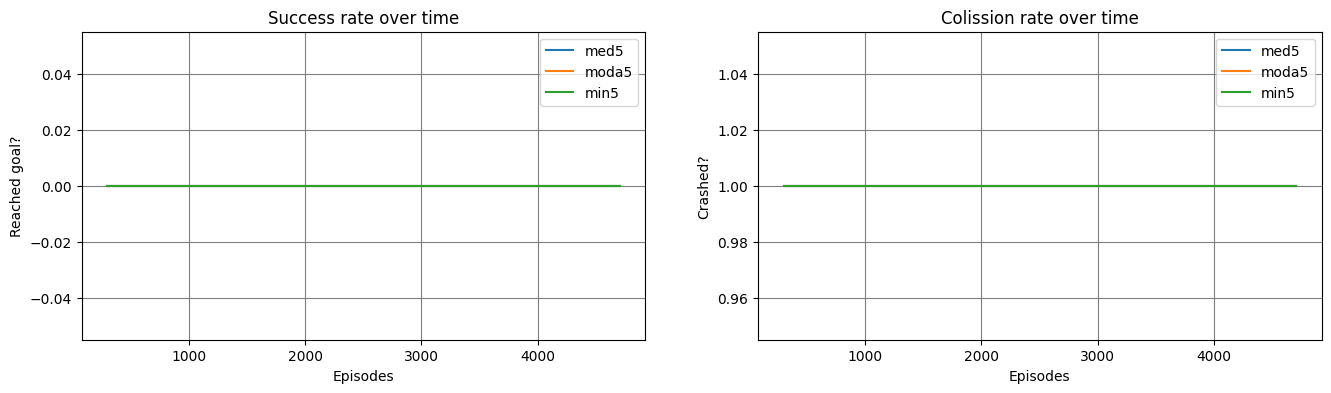

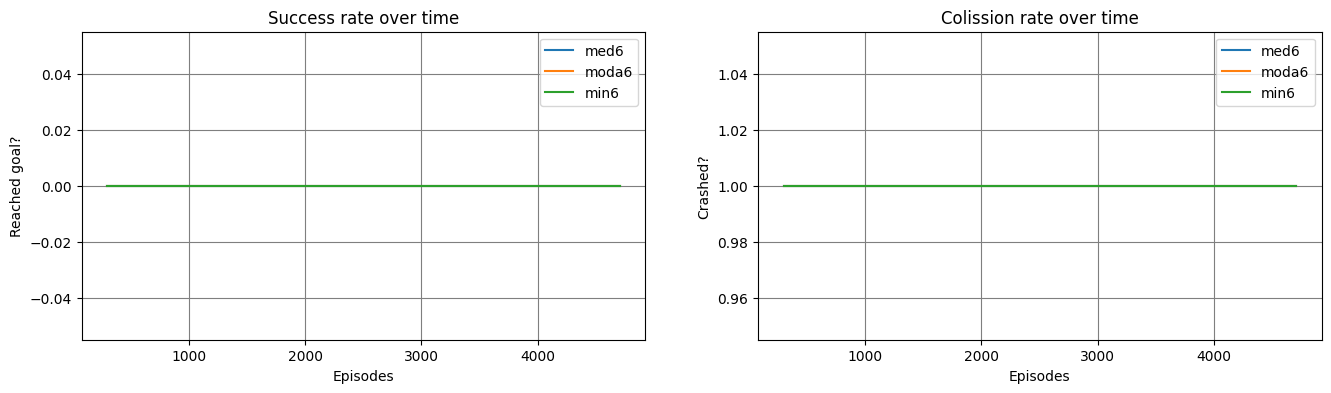

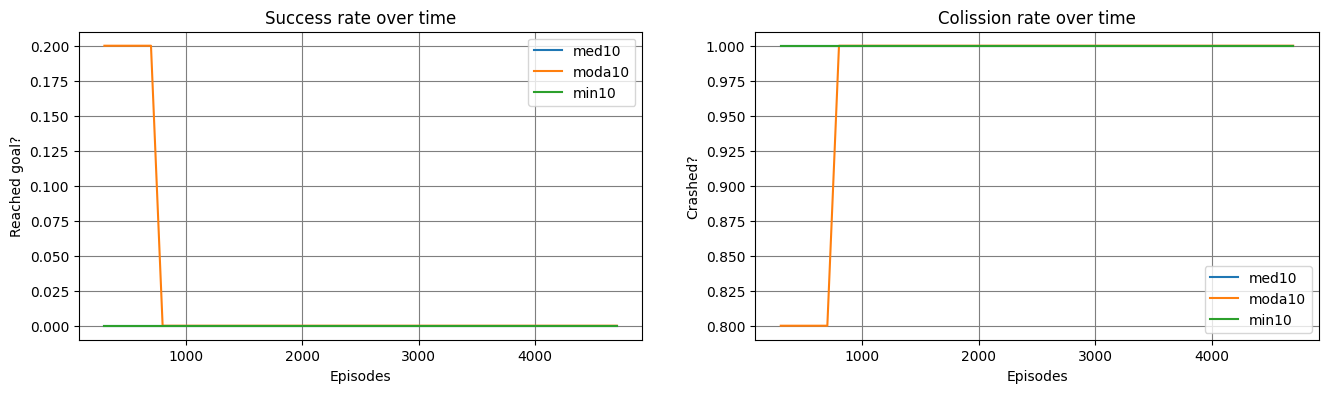

In [88]:
collision_df = pd.DataFrame({'Episodes':[]})
success_df = pd.DataFrame({'Episodes':[]})


for n_sectors in [4,5,6,10]:
    for idx, method in enumerate(map_type_path_all.keys()):
        if method.endswith(str(n_sectors)):
            hist_dict_method = shelve.open(path+map_type_path_all[method])['hist_dict']

            success_df_method = get_success_df(hist_dict_method,method)
            collision_df_method = get_collision_df(hist_dict_method,method)

            success_df = success_df.merge(success_df_method, on = 'Episodes', how = 'inner' if idx>0 else 'right')
            collision_df = collision_df.merge(collision_df_method, on = 'Episodes', how = 'inner' if idx>0 else 'right')

    plt.figure(figsize=(16,4));
    plt.subplot(121);
    for method in map_type_path_all.keys():
        if method.endswith(str(n_sectors)):
            sns.lineplot(success_df.rolling(5).mean(),x = 'Episodes', y='Success'+method, label=method);
            #sns.scatterplot(rewards_df,x = 'Episodes', y='Rewards'+method, label=method, alpha = 0.3);

    plt.legend()
    plt.title('Success rate over time');
    plt.ylabel('Reached goal?')
    plt.grid(True, c='tab:gray')

    plt.subplot(122);
    for method in map_type_path_all.keys():
        if method.endswith(str(n_sectors)):
            sns.lineplot(collision_df.rolling(5).mean(),x = 'Episodes', y='Colission'+method, label=method);
            #sns.scatterplot(distances_df,x = 'Episodes', y='Distances'+method, label=method, alpha = 0.3);
    plt.legend()
    plt.title('Colission rate over time');
    plt.ylabel('Crashed?')
    plt.grid(True, c='tab:gray')